In [1]:
import pandas as pd
from settings import *
from scrape import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
scrapePage(anacUrl)

2019
2019-01.csv
Arquivo já foi baixado anteriorment.
2019-02.csv
Arquivo já foi baixado anteriorment.
2019-03.csv
Arquivo já foi baixado anteriorment.
2019-04.csv
Arquivo já foi baixado anteriorment.
2019-05.csv
Arquivo já foi baixado anteriorment.
2019-06.csv
Arquivo já foi baixado anteriorment.
2019-07.csv
Arquivo já foi baixado anteriorment.
2019-08.csv
Arquivo já foi baixado anteriorment.
2019-09.csv
Arquivo já foi baixado anteriorment.
2019-10.csv
Arquivo já foi baixado anteriorment.
2019-11.csv
Arquivo já foi baixado anteriorment.
2019-12.csv
Arquivo já foi baixado anteriorment.
2018
2018-01.csv
Arquivo já foi baixado anteriorment.
2018-02.csv
Arquivo já foi baixado anteriorment.
2018-03.csv
Arquivo já foi baixado anteriorment.
2018-04.csv
Arquivo já foi baixado anteriorment.
2018-05.csv
Arquivo já foi baixado anteriorment.
2018-06.csv
Arquivo já foi baixado anteriorment.
2018-07.csv
Arquivo já foi baixado anteriorment.
2018-08.csv
Arquivo já foi baixado anteriorment.
2018-09.cs

In [26]:
voos = []
for i in range(1, 13):
        print('Quantidade de voos em 2019, mês : ', i)
        sep = [';', ',','\t']
        sepIndex = 0
        while True:
            try:
                fileCsv = pd.read_csv(
                    f'data/2019-{i:02}.csv', encoding='ISO-8859-1', sep=sep[sepIndex])
                if ('internet' in fileCsv.columns[0]):
                    fileCsv.columns = fileCsv.iloc[0]
                    fileCsv = fileCsv[1:]
                if len(fileCsv.columns) <= 1:
                    raise ValueError('sepIndex')
                else:
                    try:
                        fileCsv = fileCsv.drop(columns='Data Prevista')
                    except:
                        pass
                    fileCsv.columns = ['ICAO Empresa Aérea', 'Número Voo', 'Código DI', 'Código Tipo Linha',
                                       'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino', 'Partida Prevista',
                                       'Partida Real', 'Chegada Prevista', 'Chegada Real', 'Situação Voo',
                                       'Código Justificativa']
                situacao = fileCsv['Situação Voo']
                voos.append(situacao.value_counts())
                break
            except Exception as e:
                if e.args[0] == 'sepIndex':
                    if (sepIndex < 3):
                        sepIndex += 1
                else:
                    print(e)

Quantidade de voos em 2019, mês :  1
Quantidade de voos em 2019, mês :  2
Quantidade de voos em 2019, mês :  3
Quantidade de voos em 2019, mês :  4
Quantidade de voos em 2019, mês :  5
Quantidade de voos em 2019, mês :  6
Quantidade de voos em 2019, mês :  7
Quantidade de voos em 2019, mês :  8
Quantidade de voos em 2019, mês :  9
Quantidade de voos em 2019, mês :  10
Quantidade de voos em 2019, mês :  11
Quantidade de voos em 2019, mês :  12


In [13]:
voos

[Realizado    102107
 Cancelado     12529
 Name: Situação Voo, dtype: int64,
 Realizado    89114
 Cancelado    12879
 Name: Situação Voo, dtype: int64,
 Realizado    96008
 Cancelado    14999
 Name: Situação Voo, dtype: int64,
 Realizado    90999
 Cancelado    15921
 Name: Situação Voo, dtype: int64,
 Realizado    92816
 Cancelado    15538
 Name: Situação Voo, dtype: int64,
 Realizado    90040
 Cancelado    15658
 Name: Situação Voo, dtype: int64,
 Realizado    99113
 Cancelado    13041
 Name: Situação Voo, dtype: int64,
 REALIZADO    93441
 CANCELADO    14603
 Name: Situação Voo, dtype: int64,
 REALIZADO    91264
 CANCELADO    16154
 Name: Situação Voo, dtype: int64,
 REALIZADO    94018
 CANCELADO    15128
 Name: Situação Voo, dtype: int64,
 REALIZADO       90793
 CANCELADO       13591
 Situação Voo        1
 Name: Situação Voo, dtype: int64,
 REALIZADO       97357
 CANCELADO       14459
 Situação Voo        1
 Name: Situação Voo, dtype: int64]

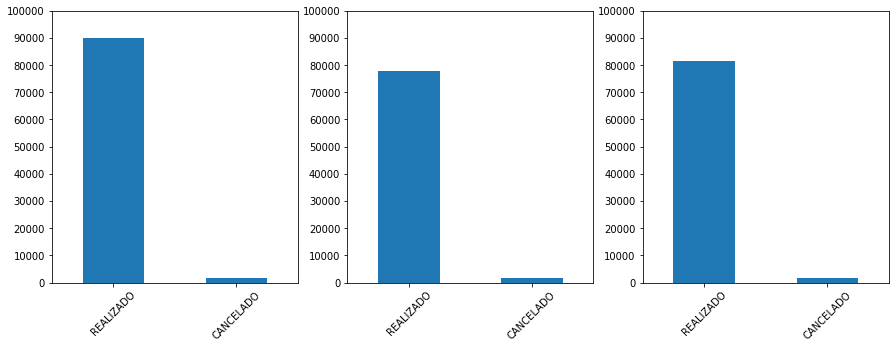

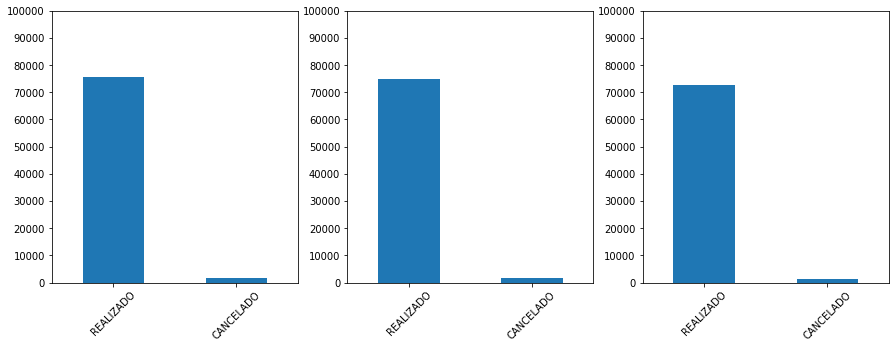

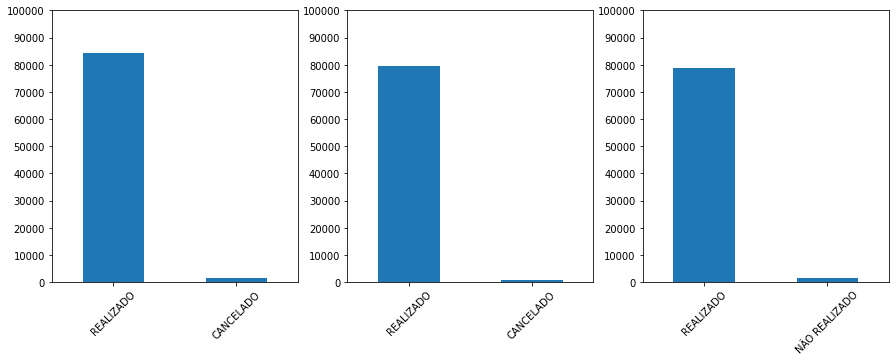

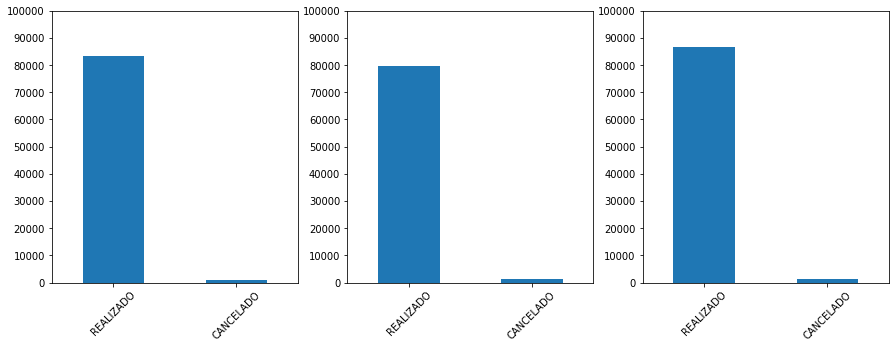

In [23]:
for i in range(0, len(voos), 3):
    fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
    for x in range(3):
        voos[i + x].plot(kind='bar', ax=axs[(i + x)%3])
        plt.xticks(rotation=50)
        labels = axs[x].get_xticklabels()
        for label in labels:
            label.set_rotation(45)
        plt.setp(axs,
        yticks=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000])

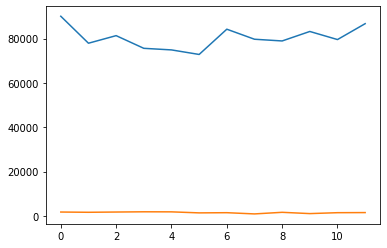

In [24]:
plt.plot(voos)
plt.show()